### To load Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

### To load data

In [2]:
churn = pd.read_csv("https://rathachai.github.io/DA101/data/customer-churn-data.csv")

In [3]:
churn

,Gender,Age,Payment Method,LastTransaction,Churn
0,male,64,credit card,98,loyal
1,male,35,cheque,118,churn
2,female,25,credit card,107,loyal
3,female,39,credit card,177,NaN
4,male,39,credit card,90,loyal
...,...,...,...,...,...
991,female,29,credit card,33,loyal
992,male,84,credit card,124,loyal
993,male,20,credit card,60,NaN
994,male,19,credit card,49,loyal


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           996 non-null    object
 1   Age              996 non-null    int64 
 2   Payment Method   996 non-null    object
 3   LastTransaction  996 non-null    int64 
 4   Churn            900 non-null    object
dtypes: int64(2), object(3)
memory usage: 39.0+ KB


In [5]:
churn.describe()

,Age,LastTransaction
count,996.000000,996.000000
mean,45.616466,111.072289
std,18.776749,44.956045
min,17.000000,1.000000
25%,30.000000,77.000000
50%,44.000000,110.000000
75%,58.000000,145.000000
max,91.000000,223.000000


### To do data pre-pocessing

In [7]:
churn.dropna(inplace=True, subset=["Churn"])


In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 995
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           900 non-null    object
 1   Age              900 non-null    int64 
 2   Payment Method   900 non-null    object
 3   LastTransaction  900 non-null    int64 
 4   Churn            900 non-null    object
dtypes: int64(2), object(3)
memory usage: 42.2+ KB


### To do data exploration

#### to view data

<AxesSubplot:xlabel='Churn', ylabel='count'>

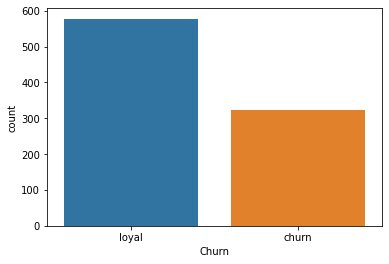

In [10]:
sns.countplot(x="Churn", data=churn)

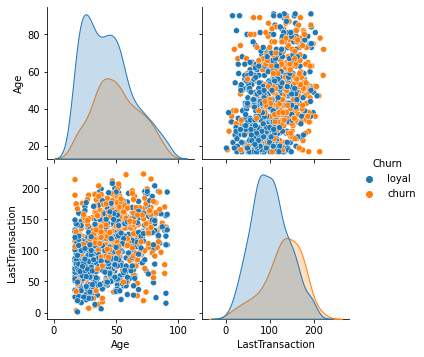

In [11]:
sns.pairplot(churn, hue="Churn")

<AxesSubplot:xlabel='Gender', ylabel='count'>

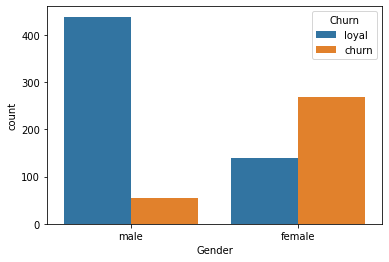

In [12]:
sns.countplot(x="Gender", hue="Churn", data=churn)

#### to do data encoder

In [13]:
lb_make = LabelEncoder()

In [14]:
churn["Gender Code"] = lb_make.fit_transform(churn["Gender"])

In [15]:
churn

,Gender,Age,Payment Method,LastTransaction,Churn,Gender Code
0,male,64,credit card,98,loyal,1
1,male,35,cheque,118,churn,1
2,female,25,credit card,107,loyal,0
4,male,39,credit card,90,loyal,1
5,female,28,cheque,189,churn,0
...,...,...,...,...,...,...
990,male,19,credit card,92,loyal,1
991,female,29,credit card,33,loyal,0
992,male,84,credit card,124,loyal,1
994,male,19,credit card,49,loyal,1


#### To do one-hot encoding

In [16]:
churn = pd.get_dummies(churn, columns=["Payment Method"])

In [17]:
churn

,Gender,Age,LastTransaction,Churn,Gender Code,Payment Method_cash,Payment Method_cheque,Payment Method_credit card
0,male,64,98,loyal,1,0,0,1
1,male,35,118,churn,1,0,1,0
2,female,25,107,loyal,0,0,0,1
4,male,39,90,loyal,1,0,0,1
5,female,28,189,churn,0,0,1,0
...,...,...,...,...,...,...,...,...
990,male,19,92,loyal,1,0,0,1
991,female,29,33,loyal,0,0,0,1
992,male,84,124,loyal,1,0,0,1
994,male,19,49,loyal,1,0,0,1


### To do **`Logistic Regression`**

#### To select data

In [19]:
X = churn[["Age", "LastTransaction", "Gender Code", "Payment Method_cash", "Payment Method_cheque","Payment Method_credit card"]]
y = churn["Churn"]

In [20]:
X

,Age,LastTransaction,Gender Code,Payment Method_cash,Payment Method_cheque,Payment Method_credit card
0,64,98,1,0,0,1
1,35,118,1,0,1,0
2,25,107,0,0,0,1
4,39,90,1,0,0,1
5,28,189,0,0,1,0
...,...,...,...,...,...,...
990,19,92,1,0,0,1
991,29,33,0,0,0,1
992,84,124,1,0,0,1
994,19,49,1,0,0,1


In [21]:
y

0      loyal
1      churn
2      loyal
4      loyal
5      churn
       ...  
990    loyal
991    loyal
992    loyal
994    loyal
995    loyal
Name: Churn, Length: 900, dtype: object

### To split train and test set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

### to train and create a linear regression model

In [23]:
clf = LogisticRegression()

In [25]:
clf.fit(X_train, y_train)

LogisticRegression()

In [26]:
clf.coef_

array([[-0.02332472, -0.00775513,  2.76546143, -0.24696719, -0.32714535,
         0.57098283]])

In [27]:
clf.intercept_

array([1.08269557])

### To predict from the test set

In [28]:
y_pred = clf.predict(X_test)

In [29]:
y_pred

array(['loyal', 'loyal', 'churn', 'loyal', 'churn', 'churn', 'churn',
       'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'churn',
       'churn', 'loyal', 'loyal', 'churn', 'loyal', 'churn', 'loyal',
       'loyal', 'loyal', 'churn', 'churn', 'loyal', 'churn', 'churn',
       'loyal', 'loyal', 'churn', 'churn', 'churn', 'churn', 'loyal',
       'churn', 'churn', 'loyal', 'churn', 'loyal', 'churn', 'loyal',
       'loyal', 'churn', 'loyal', 'loyal', 'churn', 'loyal', 'loyal',
       'churn', 'loyal', 'loyal', 'churn', 'churn', 'loyal', 'loyal',
       'churn', 'loyal', 'loyal', 'loyal', 'churn', 'churn', 'churn',
       'loyal', 'loyal', 'churn', 'loyal', 'churn', 'churn', 'loyal',
       'loyal', 'loyal', 'loyal', 'churn', 'churn', 'loyal', 'loyal',
       'loyal', 'churn', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal',
       'loyal', 'loyal', 'loyal', 'churn', 'churn', 'loyal', 'loyal',
       'churn', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal',
       'loyal', 'chu

### To evaluate the predict value with the test set

In [34]:
cm_labls = churn["Churn"].unique()
print(cm_labls)
confusion_matrix(y_test, y_pred, labels=cm_labls)


['loyal' 'churn']


array([[154,  17],
       [ 23,  76]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       churn       0.82      0.77      0.79        99
       loyal       0.87      0.90      0.89       171

    accuracy                           0.85       270
   macro avg       0.84      0.83      0.84       270
weighted avg       0.85      0.85      0.85       270



In [40]:
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1 =",f1)

F1 = 0.8508141762452107


### To do Decision Tree

In [41]:
from sklearn import tree

In [42]:
X = churn[["Age", "LastTransaction", "Gender Code", "Payment Method_cash", "Payment Method_cheque","Payment Method_credit card"]]
y = churn["Churn"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [45]:
clf = tree.DecisionTreeClassifier()

In [46]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = clf.predict(X_test)

In [49]:
print("**** Confusion Matrix ****")
cm_labls = churn["Churn"].unique()
print(cm_labls)
print(confusion_matrix(y_test, y_pred, labels=cm_labls))

print()
print("**** Report ****")
print(classification_report(y_test, y_pred))

print()
print("**** F1 ****")
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1 =", f1)

**** Confusion Matrix ****
['loyal' 'churn']
[[141  30]
 [ 35  64]]

**** Report ****
              precision    recall  f1-score   support

       churn       0.68      0.65      0.66        99
       loyal       0.80      0.82      0.81       171

    accuracy                           0.76       270
   macro avg       0.74      0.74      0.74       270
weighted avg       0.76      0.76      0.76       270


**** F1 ****
F1 = 0.7578752992588833
